## BoxOffice-Revenue
by Hans Voll

This in an ongoing project intended to accurately predict box office revenue before the release date. This will involve data cleaning, exploration and visualization, and machine learning. The source data for this analysis is located as a dataset on the Kaggle website, and is titled "The Movies" by Rounak Banik. https://www.kaggle.com/rounakbanik/the-movies-dataset


### Preprocessing Checklist
- [ ] Read and format data
- [ ] Split validation and training sets
- [ ] Process null values
- [ ] Encode categorical data
- [ ] Build model
- [ ] ...

In [1]:
!ls

BoxOffice-Revenue.ipynb links.csv               ratings.csv
credits.csv             links_small.csv         ratings_small.csv
keywords.csv            movies_metadata.csv


In [2]:
import numpy as np
import pandas as pd

dfOrig = pd.read_csv('movies_metadata.csv')
print("original data:")
print(dfOrig.dtypes)
print(dfOrig.shape)

original data:
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
(45466, 24)


/Users/hans/Library/Python/2.7/lib/python/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
#Select needed columns to reduce DataFrame size
df = dfOrig[['title','genres']]
print("selected data:")
print(df.dtypes)

selected data:
title     object
genres    object
dtype: object


In [66]:
from pandas.io.json import json_normalize
import ast

#Convert genres column from objects to strings

'''
for i in range(len(df)):
    x = df['genres'][i]       #select stringified json object
    x = ast.literal_eval(x)   #convert from str to list
    x = json_normalize(x)     #convert from json to dataframe
    x = x['name'][0]          #select first value in genre list
    df['genres'][i] = x       #set as value for genre column
'''

c = df[0:1]
a = df['genres'][0]
b = ast.literal_eval(a)
b = json_normalize(b)
print(a)
print(b)
print("now fixed... ???")
d = b['name'][0]
df['genres'][0] = d
df.head()


#print(c)

#merged = pd.merge(c, b, left_index=True, right_on='id')
#print(merged)

ValueError: malformed string

In [45]:
df.sort_values(by=['budget'], ascending=False).head(40)

,revenue,budget,release_date,runtime,vote_average,vote_count,popularity,title,genres
34215,2.462331e+08,99000000,2015-11-05,88.0,6.5,608.0,12.338346,The Peanuts Movie,"[{'id': 16, 'name': 'Animation'}]"
39688,1.571008e+08,9900000,2016-08-25,88.0,6.7,1830.0,25.869883,Don't Breathe,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name..."
39842,2.400000e+06,9900000,2016-01-07,92.0,5.3,376.0,14.282584,Friend Request,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam..."
39793,2.341534e+06,9804690,2016-05-25,130.0,6.6,498.0,8.226065,Elle,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name..."
4142,4.330133e+08,98000000,2001-04-28,130.0,6.0,2258.0,16.9457,The Mummy Returns,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
14,1.001732e+07,98000000,1995-12-22,119.0,5.7,137.0,7.28448,Cutthroat Island,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
14710,1.329000e+08,97250400,2008-01-13,116.0,5.0,486.0,9.67194,Asterix at the Olympic Games,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na..."
42170,6.168018e+08,97000000,2017-02-28,137.0,7.6,6310.0,54.581997,Logan,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
42902,2.323802e+08,97000000,2017-05-09,122.0,5.7,2677.0,72.884078,Alien: Covenant,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na..."
14256,2.000000e+06,970000,1975-04-16,101.0,6.0,16.0,3.66954,Capone,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."


In [6]:
#Filter out values that don't apply
print("original shape:")
print(df.shape)

df = df.dropna()
print("after dropping NaN values:")
print(df.shape)

df = df[df.revenue > 1000000]
print("after dropping low revenue values:")
print(df.shape)

df = df[df.budget > 100000]
print("after dropping low budget values:")
print(df.shape)

original shape:
(45466, 9)
after dropping NaN values:
(45130, 9)
after dropping low revenue values:
(6052, 9)
after dropping low budget values:
(6052, 9)


In [7]:
#Format date from a string to a dateTime data type 
print("originial time format:")
print(type(df['release_date'][0]))

df['release_date'] = pd.to_datetime(df['release_date'],infer_datetime_format=True)
print("fixed time format:")
print(type(df['release_date'][0]))

originial time format:
<type 'str'>
fixed time format:
<class 'pandas._libs.tslib.Timestamp'>


##Explore data with various graphs

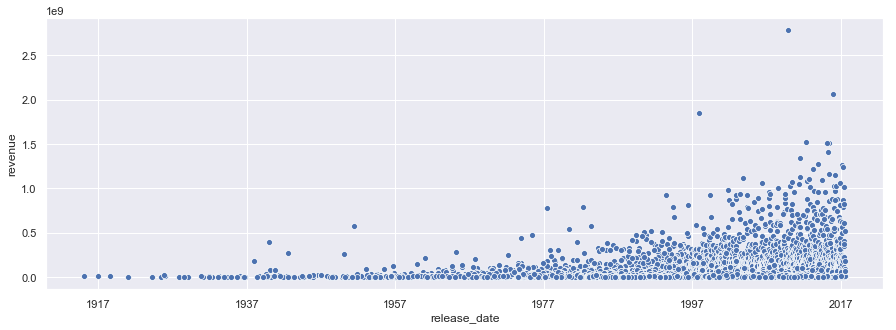

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(15,5))
#plt.xlim(1990-01-13,2017-01-01)
sns.scatterplot(x='release_date', y='revenue', data = df)


plt.show()

In [9]:
df.sort_values(by=['revenue'],ascending=False).head(40)

,revenue,budget,release_date,runtime,vote_average,vote_count,popularity,title,genres
14551,2.787965e+09,237000000,2009-12-10,162.0,7.2,12114.0,185.071,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
26555,2.068224e+09,245000000,2015-12-15,136.0,7.5,7993.0,31.626,Star Wars: The Force Awakens,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1639,1.845034e+09,200000000,1997-11-18,194.0,7.5,7770.0,26.8891,Titanic,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n..."
17818,1.519558e+09,220000000,2012-04-25,143.0,7.4,12000.0,89.8876,The Avengers,"[{'id': 878, 'name': 'Science Fiction'}, {'id'..."
25084,1.513529e+09,150000000,2015-06-09,124.0,6.5,8842.0,32.7905,Jurassic World,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
28830,1.506249e+09,190000000,2015-04-01,137.0,7.3,4253.0,27.2757,Furious 7,"[{'id': 28, 'name': 'Action'}]"
26558,1.405404e+09,280000000,2015-04-22,141.0,7.3,6908.0,37.3794,Avengers: Age of Ultron,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
17437,1.342000e+09,125000000,2011-07-07,130.0,7.9,6141.0,24.9907,Harry Potter and the Deathly Hallows: Part 2,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '..."
22110,1.274219e+09,150000000,2013-11-27,102.0,7.3,5440.0,24.2482,Frozen,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '..."
42222,1.262886e+09,160000000,2017-03-16,129.0,6.8,5530.0,287.253654,Beauty and the Beast,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '..."


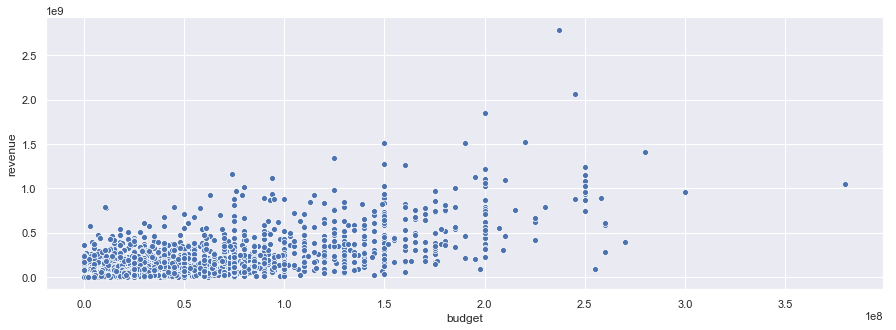

In [10]:
sns.set()
plt.figure(figsize=(15,5))
sns.scatterplot(x='budget', y='revenue', data = df)

plt.show()

In [11]:
df.sort_values(by=['budget'], ascending=False).head(40)

,revenue,budget,release_date,runtime,vote_average,vote_count,popularity,title,genres
34215,2.462331e+08,99000000,2015-11-05,88.0,6.5,608.0,12.338346,The Peanuts Movie,"[{'id': 16, 'name': 'Animation'}]"
39688,1.571008e+08,9900000,2016-08-25,88.0,6.7,1830.0,25.869883,Don't Breathe,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name..."
39842,2.400000e+06,9900000,2016-01-07,92.0,5.3,376.0,14.282584,Friend Request,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam..."
39793,2.341534e+06,9804690,2016-05-25,130.0,6.6,498.0,8.226065,Elle,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name..."
4142,4.330133e+08,98000000,2001-04-28,130.0,6.0,2258.0,16.9457,The Mummy Returns,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
14,1.001732e+07,98000000,1995-12-22,119.0,5.7,137.0,7.28448,Cutthroat Island,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
14710,1.329000e+08,97250400,2008-01-13,116.0,5.0,486.0,9.67194,Asterix at the Olympic Games,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na..."
42170,6.168018e+08,97000000,2017-02-28,137.0,7.6,6310.0,54.581997,Logan,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
42902,2.323802e+08,97000000,2017-05-09,122.0,5.7,2677.0,72.884078,Alien: Covenant,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na..."
14256,2.000000e+06,970000,1975-04-16,101.0,6.0,16.0,3.66954,Capone,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."


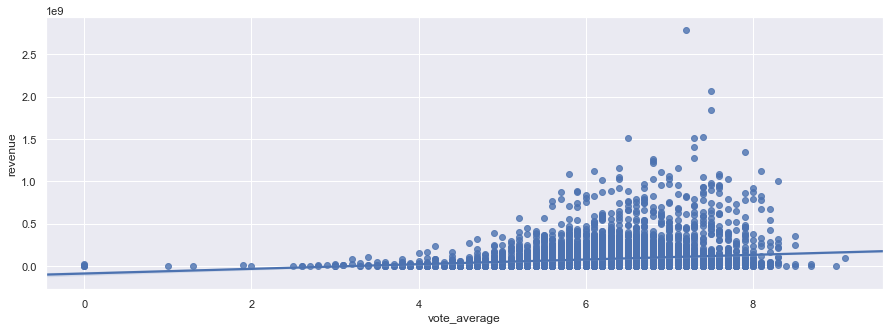

In [12]:
sns.set()
plt.figure(figsize=(15,5))
sns.regplot(x='vote_average', y='revenue', data = df)

plt.show()

In [13]:
df.sort_values(by=['vote_average'],ascending=False).head(40)

,revenue,budget,release_date,runtime,vote_average,vote_count,popularity,title,genres
10309,1.000000e+08,13200000,1995-10-20,190.0,9.1,661.0,34.457,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
34924,4.400000e+06,1500000,2015-11-12,162.0,9.0,2.0,0.446454,Katyar Kaljat Ghusali,"[{'id': 10402, 'name': 'Music'}]"
43321,1.920459e+07,0,2016-11-12,128.0,8.7,19.0,2.914029,In This Corner of the World,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '..."
2743,4.978922e+06,1200000,1984-11-16,88.0,8.7,47.0,2.35957,Stop Making Sense,"[{'id': 99, 'name': 'Documentary'}, {'id': 104..."
834,2.450664e+08,6000000,1972-03-14,175.0,8.5,6024.0,41.1093,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
40251,3.552983e+08,0,2016-08-26,106.0,8.5,1030.0,34.461252,Your Name.,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ..."
314,2.834147e+07,25000000,1994-09-23,142.0,8.5,8358.0,51.6454,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
5613,1.400000e+06,300000,1981-02-05,105.0,8.5,4.0,1.02316,Goodbye Pork Pie,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '..."
25746,1.645711e+06,0,1983-08-05,92.0,8.4,4.0,0.584128,Get Crazy,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '..."
12481,1.004558e+09,185000000,2008-07-16,152.0,8.3,12269.0,123.167,The Dark Knight,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name..."


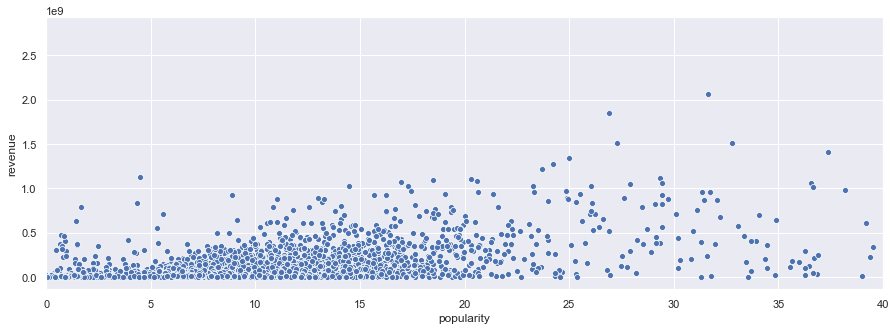

In [14]:
sns.set()
plt.figure(figsize=(15,5))
sns.scatterplot(x='popularity', y='revenue', data = df)
plt.xlim(0, 40)
plt.show()

In [15]:
df.sort_values(by=['popularity'],ascending=False).head(40)

,revenue,budget,release_date,runtime,vote_average,vote_count,popularity,title,genres
37927,108758521.0,35000000,2016-05-04,91.0,5.6,1490.0,9.914008,Neighbors 2: Sorority Rising,"[{'id': 35, 'name': 'Comedy'}]"
41814,194647323.0,22000000,2017-01-19,100.0,6.6,657.0,9.863789,A Dog's Purpose,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
41596,5816211.0,7000000,2016-12-25,119.0,7.3,213.0,9.855927,20th Century Women,"[{'id': 18, 'name': 'Drama'}]"
34791,1702433.0,0,2015-08-28,106.0,6.6,194.0,9.786662,A Perfect Day,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
39773,18803648.0,9000000,2016-11-18,104.0,7.3,952.0,9.51953,The Edge of Seventeen,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
40952,29918745.0,40000000,2016-10-20,105.0,5.9,608.0,9.48515,Keeping Up with the Joneses,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
43145,14054361.0,17820000,2004-01-28,94.0,6.2,228.0,9.482248,RRRrrrr!!!,"[{'id': 35, 'name': 'Comedy'}]"
38983,3295624.0,0,2016-04-07,97.0,6.2,416.0,9.449103,Before I Wake,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name..."
39989,29200000.0,25000000,2016-09-29,94.0,5.6,600.0,9.434588,Masterminds,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
35976,124827316.0,40000000,2016-01-14,102.0,6.1,567.0,9.420931,Ride Along 2,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."


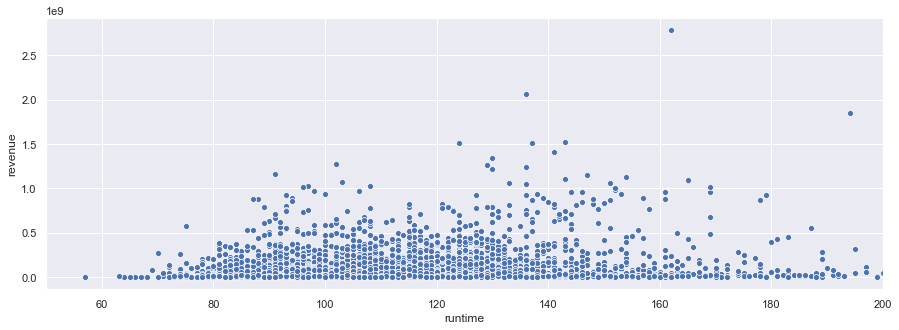

In [16]:
sns.set()
plt.figure(figsize=(15,5))
sns.scatterplot(x='runtime', y='revenue', data = df)
plt.xlim(50,200)
plt.show()

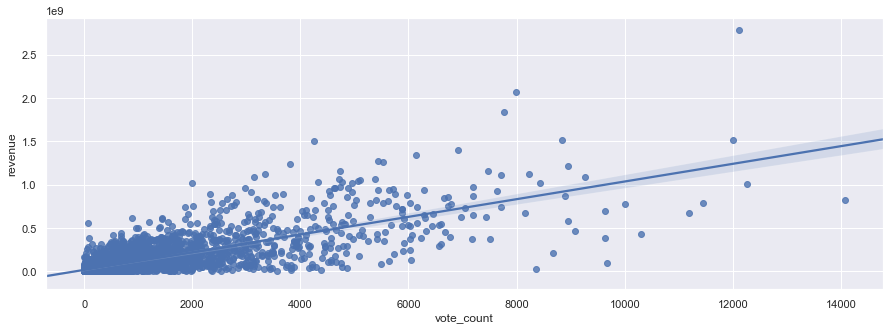

In [17]:
sns.set()
plt.figure(figsize=(15,5))
sns.regplot(x='vote_count', y='revenue', data = df)

plt.show()

In [18]:
df.sort_values(by=['vote_count'],ascending=False).head(40)

,revenue,budget,release_date,runtime,vote_average,vote_count,popularity,title,genres
15480,8.255328e+08,160000000,2010-07-14,148.0,8.1,14075.0,29.1081,Inception,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
12481,1.004558e+09,185000000,2008-07-16,152.0,8.3,12269.0,123.167,The Dark Knight,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name..."
14551,2.787965e+09,237000000,2009-12-10,162.0,7.2,12114.0,185.071,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
17818,1.519558e+09,220000000,2012-04-25,143.0,7.4,12000.0,89.8876,The Avengers,"[{'id': 878, 'name': 'Science Fiction'}, {'id'..."
26564,7.831130e+08,58000000,2016-02-09,108.0,7.4,11444.0,187.86,Deadpool,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
22879,6.751200e+08,165000000,2014-11-05,169.0,8.1,11187.0,32.2135,Interstellar,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '..."
20051,4.253682e+08,100000000,2012-12-25,165.0,7.8,10297.0,19.785,Django Unchained,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name..."
23753,7.733286e+08,170000000,2014-07-30,121.0,7.9,10014.0,53.2916,Guardians of the Galaxy,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na..."
2843,1.008538e+08,63000000,1999-10-15,139.0,8.3,9678.0,63.8696,Fight Club,"[{'id': 18, 'name': 'Drama'}]"
18244,6.912107e+08,75000000,2012-03-12,142.0,6.9,9634.0,20.0317,The Hunger Games,"[{'id': 878, 'name': 'Science Fiction'}, {'id'..."


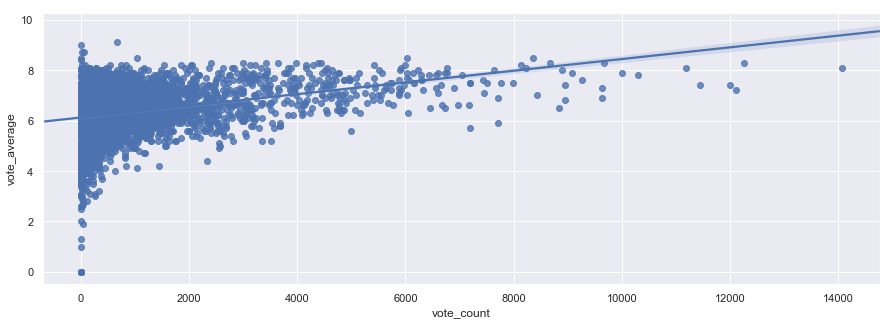

In [19]:
sns.set()
plt.figure(figsize=(15,5))
sns.regplot(x='vote_count', y='vote_average', data = df)

plt.show()

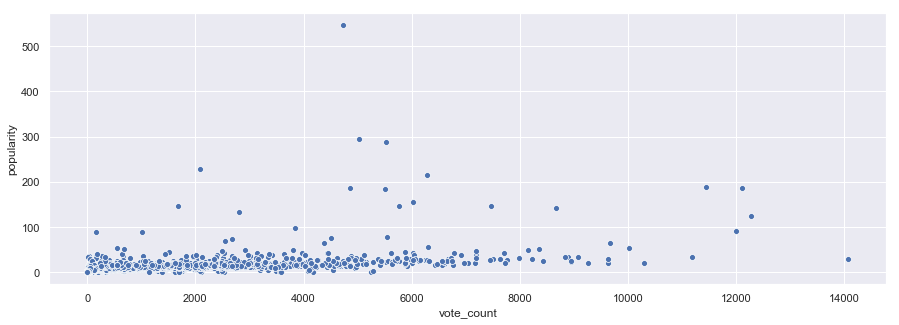

In [20]:
sns.set()
plt.figure(figsize=(15,5))
sns.scatterplot(x='vote_count', y='popularity', data = df)

plt.show()

In [21]:
y = df.revenue
features = ['vote_count','revenue','runtime']
X = df[features]

In [22]:
from sklearn.tree import DecisionTreeRegressor
revenue_model = DecisionTreeRegressor(random_state=1)
revenue_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [23]:
print("predicting first 25 movies:")
print(X.head(25))
print("Predictions are $$$..")
print(revenue_model.predict(X.head(25)))

predicting first 25 movies:
    vote_count      revenue  runtime
0       5415.0  373554033.0     81.0
1       2413.0  262797249.0    104.0
3         34.0   81452156.0    127.0
4        173.0   76578911.0    106.0
5       1886.0  187436818.0    170.0
8        174.0   64350171.0    106.0
9       1194.0  352194034.0    130.0
10       199.0  107879496.0    106.0
12       423.0   11348324.0     78.0
13        72.0   13681765.0    192.0
14       137.0   10017322.0    119.0
15      1343.0  116112375.0    178.0
16       364.0  135000000.0    136.0
17       539.0    4300000.0     98.0
18      1128.0  212385533.0     90.0
19       224.0   35431113.0    103.0
20       305.0  115101622.0    105.0
22       394.0   30303072.0    132.0
24       365.0   49800000.0    112.0
26        91.0   27400000.0    100.0
28       308.0    1738611.0    108.0
30       249.0  180000000.0     99.0
31      2470.0  168840000.0    129.0
33       756.0  254134910.0     89.0
35       350.0   39363635.0    122.0
Prediction

In [24]:
df['title'].head(25)

0                          Toy Story
1                            Jumanji
3                  Waiting to Exhale
4        Father of the Bride Part II
5                               Heat
8                       Sudden Death
9                          GoldenEye
10            The American President
12                             Balto
13                             Nixon
14                  Cutthroat Island
15                            Casino
16             Sense and Sensibility
17                        Four Rooms
18    Ace Ventura: When Nature Calls
19                       Money Train
20                        Get Shorty
22                         Assassins
24                 Leaving Las Vegas
26                      Now and Then
28         The City of Lost Children
30                   Dangerous Minds
31                    Twelve Monkeys
33                              Babe
35                  Dead Man Walking
Name: title, dtype: object

In [25]:
#Calculate mean absolute error (MAE) without splitting into training and validation data
from sklearn.metrics import mean_absolute_error

predicted_revenue = revenue_model.predict(X)
mean_absolute_error(y, predicted_revenue)

0.0

In [26]:
#Split into training('train_') and validation('val_') data, then recalculate MAE.
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
revenue_model = DecisionTreeRegressor()
revenue_model.fit(train_X, train_y)
val_predictions = revenue_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

383379.757436


In [27]:
dfOrig.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
